In [244]:
import pandas as pd

df = pd.read_csv("troop_movements.csv")

counts = df['empire_or_resistance'].value_counts()

# Print the counts
counts_df = counts.reset_index()
counts_df.columns = ['empire_or_resistance', 'count']

# Print the DataFrame
print(counts_df)


  empire_or_resistance  count
0               empire    518
1           resistance    482


In [245]:
homeworlds = (df['homeworld'].value_counts())
# Print the counts
homeworlds_df = homeworlds.reset_index()
homeworlds_df.columns = ['homeworld', 'count']

# Print the DataFrame
print(homeworlds_df)

       homeworld  count
0           Ojom     34
1        Stewjon     32
2     Haruun Kal     30
3      Trandosha     29
4          Kalee     29
5       Mon Cala     28
6       Toydaria     28
7        Dagobah     27
8         Umbara     27
9       Alderaan     27
10   Aleen Minor     26
11        Mirial     25
12      Dathomir     25
13       Sullust     25
14        Ryloth     25
15  Concord Dawn     25
16      Kashyyyk     25
17        Eriadu     24
18       Iktotch     24
19      Tatooine     24
20      Iridonia     24
21    Muunilinst     23
22      Corellia     23
23   Glee Anselm     23
24       Serenno     23
25       Quermia     23
26          Tund     23
27       Tholoth     23
28       Vulpter     22
29         Dorin     22
30     Malastare     22
31    Bestine IV     22
32         Cerea     21
33         Rodia     20
34      Champala     20
35       Troiken     20
36         Zolan     20
37         Naboo     19
38       Socorro     18
39         Skako     17
40         Shili

In [246]:
unit_types = (df['unit_type'].value_counts())
# Print the counts
unit_types_df = unit_types.reset_index()
unit_types_df.columns = ['unit_type', 'count']

# Print the DataFrame
print(unit_types_df)

            unit_type  count
0  resistance_soldier    133
1        tie_silencer    131
2        stormtrooper    129
3              x-wing    129
4               at-at    128
5             unknown    121
6               at-st    118
7         tie_fighter    111


In [247]:
df['is_resistance'] = df['empire_or_resistance'].apply(lambda x: True if x == "resistance" else False)
print(df)

               timestamp  unit_id           unit_type empire_or_resistance  \
0    2025-07-08 10:23:34        1         tie_fighter           resistance   
1    2025-07-08 10:23:33        2        stormtrooper               empire   
2    2025-07-08 10:23:32        3               at-at           resistance   
3    2025-07-08 10:23:31        4               at-at           resistance   
4    2025-07-08 10:23:30        5             unknown               empire   
..                   ...      ...                 ...                  ...   
995  2025-07-08 10:06:59      996              x-wing           resistance   
996  2025-07-08 10:06:58      997         tie_fighter               empire   
997  2025-07-08 10:06:57      998              x-wing               empire   
998  2025-07-08 10:06:56      999  resistance_soldier               empire   
999  2025-07-08 10:06:55     1000  resistance_soldier               empire   

     location_x  location_y  destination_x  destination_y    ho

<BarContainer object of 2 artists>

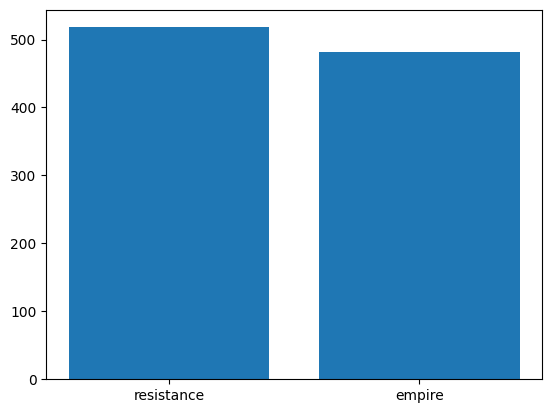

In [248]:
from matplotlib import pyplot as plt 

plt.bar(df['empire_or_resistance'].unique(), df['empire_or_resistance'].value_counts())

In [249]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#X = df[['homeworld', 'unit_type']]
#print(df.columns)
y = df['is_resistance']


In [250]:
categorical_features = ['homeworld', 'unit_type']

X = pd.get_dummies(df[['homeworld', 'unit_type']])

In [251]:
dt = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6


                         Feature  Importance
48             unit_type_unknown    0.079615
0             homeworld_Alderaan    0.059302
32             homeworld_Sullust    0.049127
20            homeworld_Mon Cala    0.043354
17            homeworld_Kashyyyk    0.042790
42               unit_type_at-at    0.041996
49              unit_type_x-wing    0.039937
46         unit_type_tie_fighter    0.037727
5            homeworld_Chandrila    0.032524
26              homeworld_Ryloth    0.031385
43               unit_type_at-st    0.028106
45        unit_type_stormtrooper    0.026832
27             homeworld_Serenno    0.026823
44  unit_type_resistance_soldier    0.023050
19              homeworld_Mirial    0.022177
21          homeworld_Muunilinst    0.022034
31             homeworld_Stewjon    0.019706
37             homeworld_Troiken    0.019655
9             homeworld_Dathomir    0.019620
38                homeworld_Tund    0.019417
12         homeworld_Glee Anselm    0.019290
34        

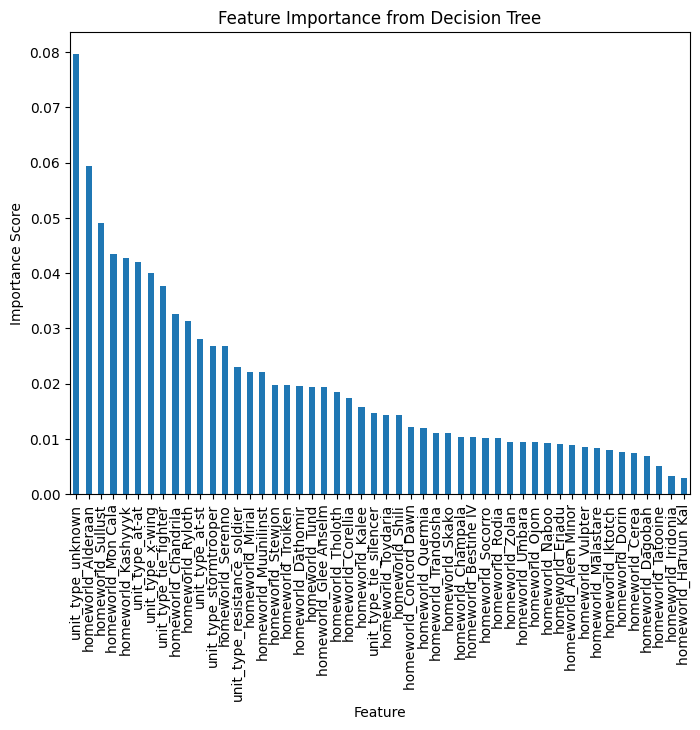

In [252]:
importances = dt.feature_importances_



feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print(feature_importances)

# Plot the feature importances
feature_importances.plot(kind='bar', x='Feature', y='Importance', figsize=(8, 6), legend=False)
plt.title("Feature Importance from Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.show()


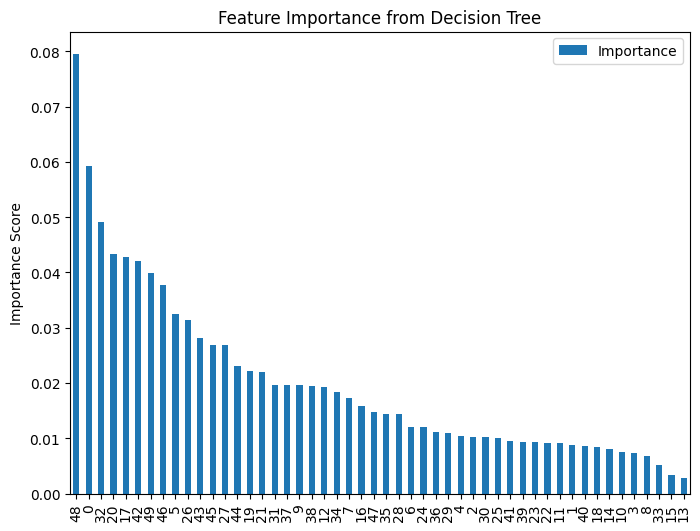

In [253]:
feature_importances.plot(kind='bar', figsize=(8,6))
plt.title("Feature Importance from Decision Tree")
plt.ylabel("Importance Score")
plt.show()
##plt.bar(feature_importances['Feature'], max(feature_importances['Importance'])) # make names vertica;l
#plt.xticks(rotation=90)

In [254]:
import pickle as pkl

with open("trained_model.pkl", "wb") as f:
    pkl.dump(dt, f)